Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob as gb

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


[link text](https://)This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) 
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

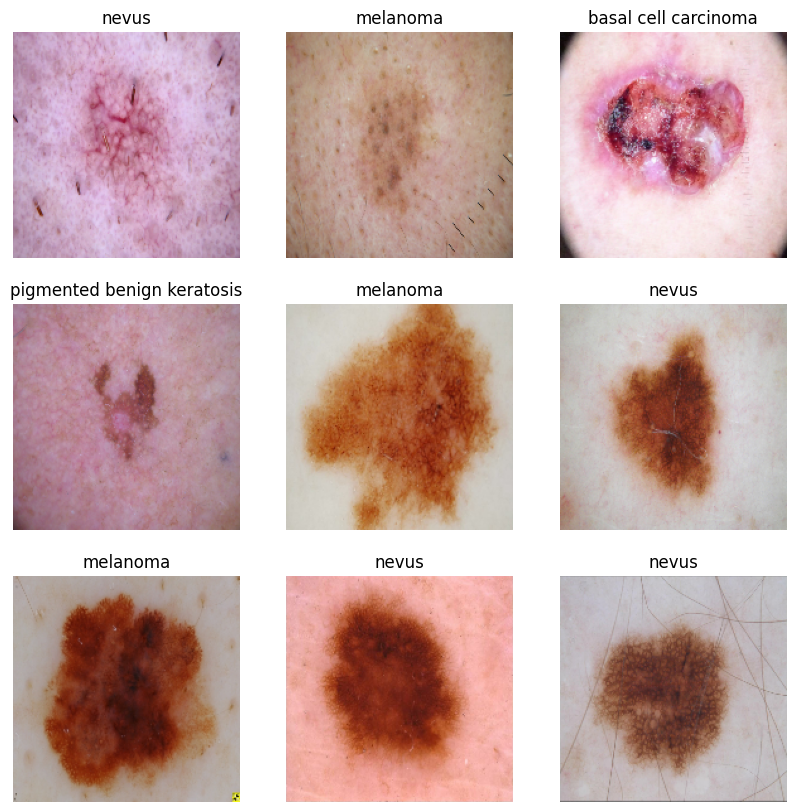

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  #taking first image of every classes and visualizing it
  for i in range(9):                      
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = Sequential([layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
                    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),                                          #Neural network layers with preprocessing and maxpooling layers
                    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(len(class_names))])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',                          #used adam optimizer along with sparse categorical cross entropy
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,                 #training model with 20 epochs
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 172s 676ms/step - loss: 2.0706 - accuracy: 0.2506 - val_loss: 1.9381 - val_accuracy: 0.3140
Epoch 2/20
57/57 [==============================] - 1s 20ms/step - loss: 1.7033 - accuracy: 0.4144 - val_loss: 1.6032 - val_accuracy: 0.4232
Epoch 3/20
57/57 [==============================] - 1s 20ms/step - loss: 1.4831 - accuracy: 0.4922 - val_loss: 1.6123 - val_accuracy: 0.3942
Epoch 4/20
57/57 [==============================] - 1s 21ms/step - loss: 1.3772 - accuracy: 0.5289 - val_loss: 1.4927 - val_accuracy: 0.4454
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 1.2736 - accuracy: 0.5550 - val_loss: 1.4112 - val_accuracy: 0.4788
Epoch 6/20
57/57 [==============================] - 1s 21ms/step - loss: 1.2676 - accuracy: 0.5611 - val_loss: 1.3234 - val_accuracy: 0.5122
Epoch 7/20
57/57 [==============================] - 1s 20ms/step - loss: 1.1352 - accuracy: 0.6050 - val_loss: 1.3396 - val_accuracy: 0.5056
Epoch 8/20

### Visualizing training results

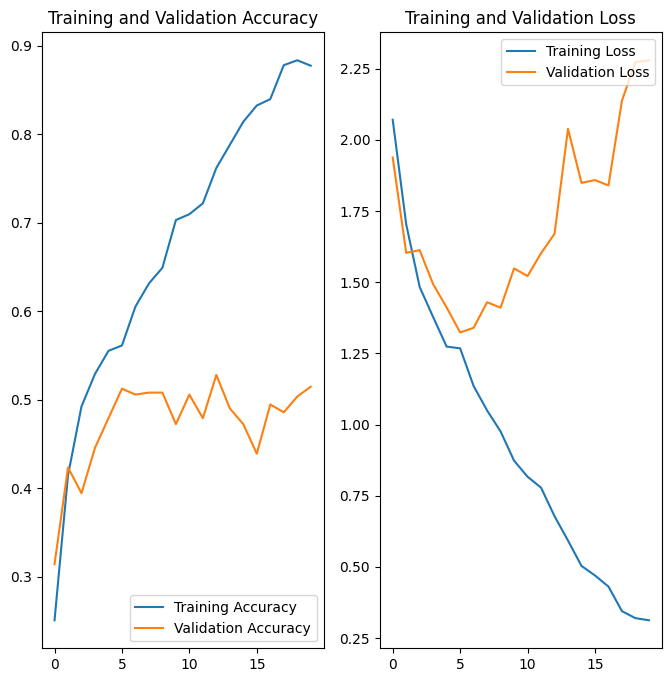

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here



1.   As we can see that training accuracy reached to 90% but validation accuracy reached only to 50% and then circulates around it.
2.   If we observe loss, trainining loss is minimizing but validation loss is increasing.

Hence, this model is an overfit model.



In [9]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

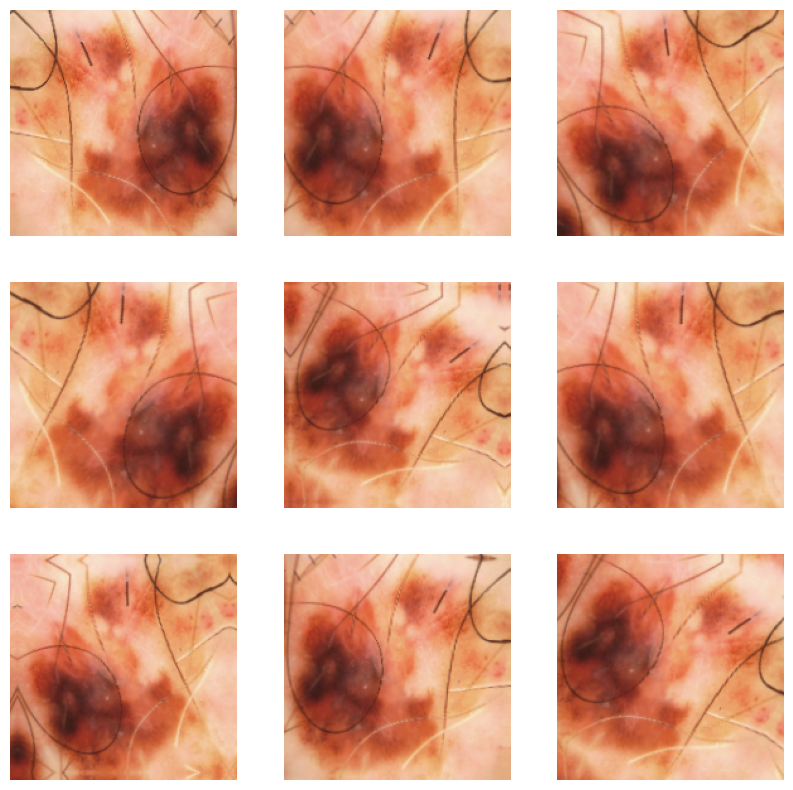

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   #visualizing one instance of image after data augmentation with multiple rotations.
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([data_augmentation,
                    layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
                    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),                                           
                    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),                                           #Added Dropout layer
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(len(class_names))])


### Compiling the model

In [ ]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)## your training code

Epoch 1/20
57/57 [==============================] - 4s 33ms/step - loss: 2.0773 - accuracy: 0.2600 - val_loss: 1.9815 - val_accuracy: 0.2450
Epoch 2/20
57/57 [==============================] - 2s 30ms/step - loss: 1.7613 - accuracy: 0.3844 - val_loss: 1.6399 - val_accuracy: 0.4076
Epoch 3/20
57/57 [==============================] - 2s 31ms/step - loss: 1.5565 - accuracy: 0.4461 - val_loss: 1.5197 - val_accuracy: 0.4633
Epoch 4/20
57/57 [==============================] - 2s 29ms/step - loss: 1.4254 - accuracy: 0.5056 - val_loss: 1.5488 - val_accuracy: 0.4165
Epoch 5/20
57/57 [==============================] - 2s 29ms/step - loss: 1.3944 - accuracy: 0.5144 - val_loss: 1.4162 - val_accuracy: 0.4811
Epoch 6/20
57/57 [==============================] - 2s 29ms/step - loss: 1.3460 - accuracy: 0.5233 - val_loss: 1.4759 - val_accuracy: 0.4477
Epoch 7/20
57/57 [==============================] - 2s 29ms/step - loss: 1.3194 - accuracy: 0.5433 - val_loss: 1.5662 - val_accuracy: 0.4321
Epoch 8/20
57

### Visualizing the results

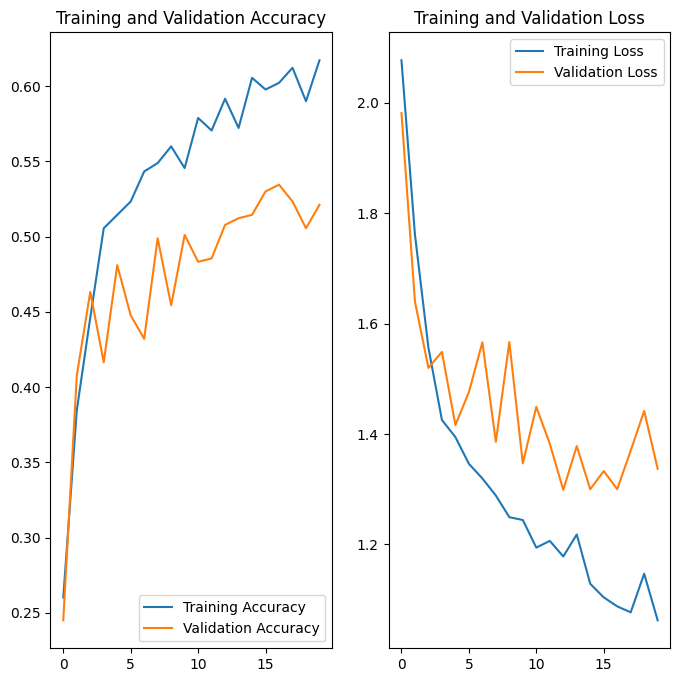

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



1.   If we observe now after data augmentation and dropout layer, our validation accuracy is improved compared to previous model.
2.   Also, if we observe validation loss has decreased compared to previos one.

Hence, this model is improved from the previous model run and is neither overfit nor underfit. We can improvise accuracies by adding more layers and more data to this model.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
class_dist = pd.DataFrame()
label_in = []
for images,label in train_ds:      #creating dataframe to visualize class imbalance in dataset
  label_in.extend(label.numpy())
print(len(label_in))

1800


In [ ]:
class_dist['Labels'] = label_in
class_dist['Class'] = class_dist['Labels'].apply(lambda x:class_names[x])        #converting labels to classes
class_dist.head()

,Labels,Class
0,3,melanoma
1,5,pigmented benign keratosis
2,1,basal cell carcinoma
3,1,basal cell carcinoma
4,5,pigmented benign keratosis


<Axes: >

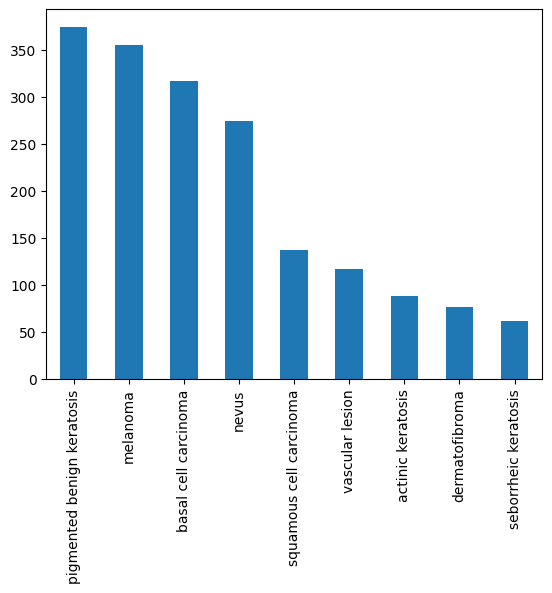

In [ ]:
class_dist['Class'].value_counts().plot(kind = 'bar')  #plotting bar to visualize count of classes

In [ ]:
path_list_original = [x for x in gb.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in gb.glob(os.path.join(data_dir_train, '*','*.jpg'))]
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))                        #creatin original dataframe with path and label with original data
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


1) 'seborrheic keratosis' has least number of samples as we can see from the above bar plot.

2) since pigmented benign keratosis has more number of samples it will dominate classes.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= r'//content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//'
import Augmentor
for i in class_names:
    print(i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

actinic keratosis
Initialised with 114 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F97DAFAAEC0>: 100%|██████████| 500/500 [00:23<00:00, 21.44 Samples/s]


basal cell carcinoma
Initialised with 386 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F97DAE27F70>: 100%|██████████| 500/500 [00:27<00:00, 17.96 Samples/s]


dermatofibroma
Initialised with 95 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F986027CD00>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


melanoma
Initialised with 438 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2597x2185 at 0x7F97E64FF580>: 100%|██████████| 500/500 [01:45<00:00,  4.75 Samples/s]


nevus
Initialised with 357 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F97DAE56E00>: 100%|██████████| 500/500 [01:30<00:00,  5.55 Samples/s]


pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F98600C6B90>: 100%|██████████| 500/500 [00:21<00:00, 23.31 Samples/s]


seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F97E644B400>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]


squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F97E64969E0>: 100%|██████████| 500/500 [00:19<00:00, 25.08 Samples/s]


vascular lesion
Initialised with 139 image(s) found.
Output directory set to //content//gdrive//MyDrive//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F97E644A620>: 100%|██████████| 500/500 [00:22<00:00, 21.87 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in gb.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027950.jpg_06bc4aa8-0528-4831-a33b-0b3c3c1a6f12.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030463.jpg_ccfe1fc7-47c8-4be5-87f1-ff92c5a70b44.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_5de4161f-1576-45e4-a2c7-db70ecb6678d.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029210.jpg_6f11cc09-765a-4434-9130-9680dd351e90.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in gb.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-33-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df.head()

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis


In [ ]:
original_df['Label'].value_counts()  #original count of images

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          386
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [ ]:
new_df['Label'].value_counts()  #count after adding 500 images to each classes

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          886
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [4]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [5]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [6]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,                #Training dataset after using augmentor and original data
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


#### **Todo:** Create a validation dataset

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,  #validation dataset after using augmentor and original data
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [12]:
## your code goes here

model = Sequential([data_augmentation,
                    layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
                    layers.BatchNormalization(),                                        #neural netowork containing batch normalization layers
                    layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(len(class_names))])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [13]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [16]:
epochs = 50
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
169/169 [==============================] - 38s 218ms/step - loss: 0.7315 - accuracy: 0.7198 - val_loss: 0.7355 - val_accuracy: 0.7146
Epoch 2/50
169/169 [==============================] - 33s 190ms/step - loss: 0.7372 - accuracy: 0.7198 - val_loss: 0.7311 - val_accuracy: 0.7139
Epoch 3/50
169/169 [==============================] - 35s 201ms/step - loss: 0.7116 - accuracy: 0.7328 - val_loss: 0.6684 - val_accuracy: 0.7398
Epoch 4/50
169/169 [==============================] - 33s 192ms/step - loss: 0.7028 - accuracy: 0.7293 - val_loss: 0.8676 - val_accuracy: 0.6857
Epoch 5/50
169/169 [==============================] - 35s 201ms/step - loss: 0.6767 - accuracy: 0.7465 - val_loss: 0.6866 - val_accuracy: 0.7205
Epoch 6/50
169/169 [==============================] - 34s 192ms/step - loss: 0.6721 - accuracy: 0.7343 - val_loss: 0.7368 - val_accuracy: 0.7287
Epoch 7/50
169/169 [==============================] - 34s 193ms/step - loss: 0.6925 - accuracy: 0.7344 - val_loss: 0.7525 - val_ac

#### **Todo:**  Visualize the model results

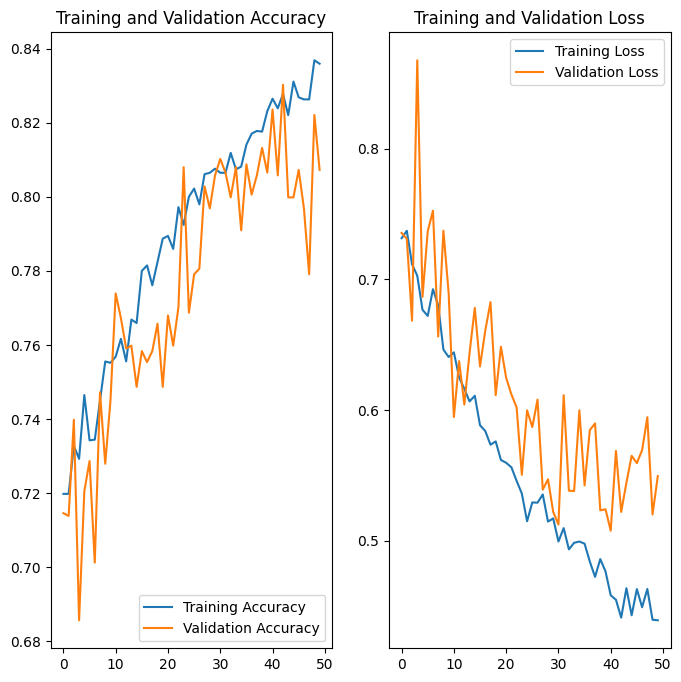

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1) As we can see from the above plot validation accuracy has increased compared previously. We used augmentor and few batch normalization layer here.

2) As we can see from the above plot validation loss has decreased more compared previously.